## **Importation des librairies**

In [2]:

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# **Importer le jeu de données**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_excel('dataForex.xlsx')
data.head()

In [ ]:
data.shape

# **Visualisation des prix de clôture en fonction du temps**

In [ ]:
time = data['Time']
close_price = data['J (Close)']

# Afficher la visualisation des prix de clôture en fonction du temps
plt.plot(time, close_price)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Close Price vs Time')
plt.show()

# **Tirer le close du dataset et le transformer en array**

In [ ]:
df = data['J (Close)']
df = np.array(df).reshape(-1,1)
df

#  Le processing du Close
- Certains algorithmes, tels que les réseaux de neurones, peuvent bénéficier d'une mise à l'échelle préalable des données pour améliorer leurs performances et leur capacité à trouver des motifs dans les données.
-  Les différentes features d'un jeu de données peuvent avoir des échelles différentes. Par exemple, une caractéristique peut être exprimée en milliers tandis qu'une autre est en décimales. Le scaling permet de mettre toutes les caractéristiques sur une même échelle, ce qui facilite la comparaison et l'analyse des données.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
#df Apres Processing

# Splitting the data
- Diviser le dataset en des donnees d'entrainement(80%) et des donnees de test(20%)

In [ ]:
#Training and test sets
train = df[:990]
test = df[990:]
#La taille de training set
print(train.shape)
#La taille de test set
print(test.shape)

### Diviser le dataframe en des sequences d'entree et des valeurs cibles

In [ ]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

- Séquences d'entrée : Les séquences d'entrée sont les séries temporelles ou les séquences de données que vous souhaitez utiliser pour faire des prédictions. Chaque séquence représente une séquence d'observations dans le temps. Par exemple, si vous prédisez le prix d'une paire Forex à partir des données historiques, chaque séquence peut contenir les prix d'echange à des intervalles de temps successifs.

- Valeurs cibles : Les valeurs cibles sont les valeurs que vous souhaitez prédire pour chaque séquence d'entrée. Dans l'exemple du prix des paires Forex, les valeurs cibles peuvent être les prix futurs que vous souhaitez prédire.

In [ ]:
look_back = 1
x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

In [ ]:
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

print(x_train.shape)
print(x_test.shape)

# Importer Le Framework keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='sigmoid',input_shape=(1,1)))
model.add(Dense(n_features))

## Une Simple Architecture de **RNN**

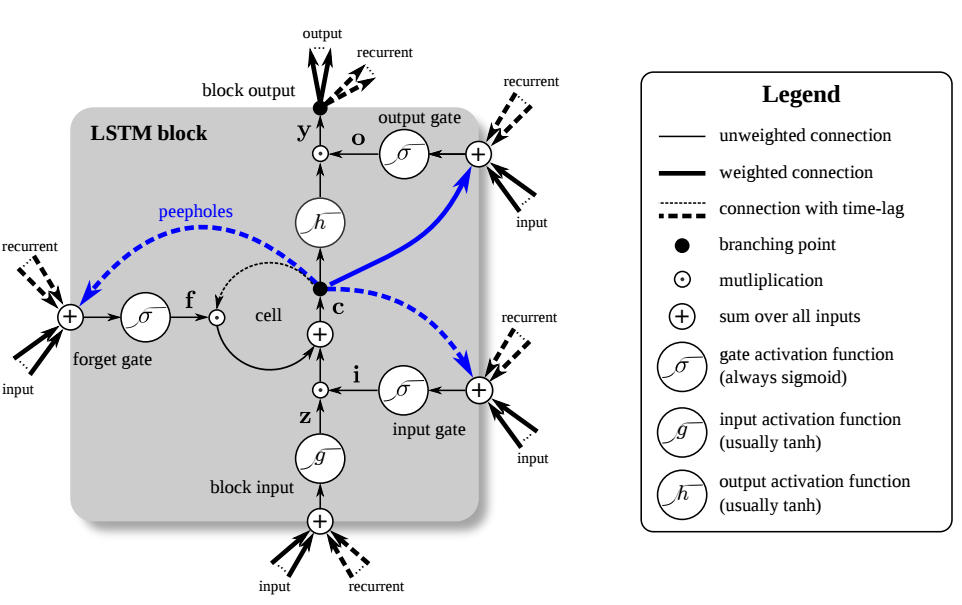

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')
#Training
model.fit(x_train,y_train, epochs = 5, batch_size=1)

Epoch 1/5
988/988 [==============================] - 6s 2ms/step - loss: 0.0253
Epoch 2/5
988/988 [==============================] - 3s 3ms/step - loss: 7.4918e-04
Epoch 3/5
988/988 [==============================] - 3s 3ms/step - loss: 6.7311e-04
Epoch 4/5
988/988 [==============================] - 2s 2ms/step - loss: 6.6052e-04
Epoch 5/5
988/988 [==============================] - 2s 2ms/step - loss: 6.2394e-04


In [41]:
#Prediction using the trained model
scaler.scale_

y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

8/8 [==============================] - 0s 3ms/step
[[1.1072958]
 [1.113948 ]
 [1.1149024]
 [1.116815 ]
 [1.1173804]
 [1.1184931]
 [1.1139003]
 [1.1123762]
 [1.1129093]
 [1.1162503]]


In [44]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[1.11713]
 [1.11813]
 [1.12013]
 [1.12072]
 [1.12188]
 [1.11708]
 [1.11548]
 [1.11604]
 [1.11954]
 [1.1154 ]]


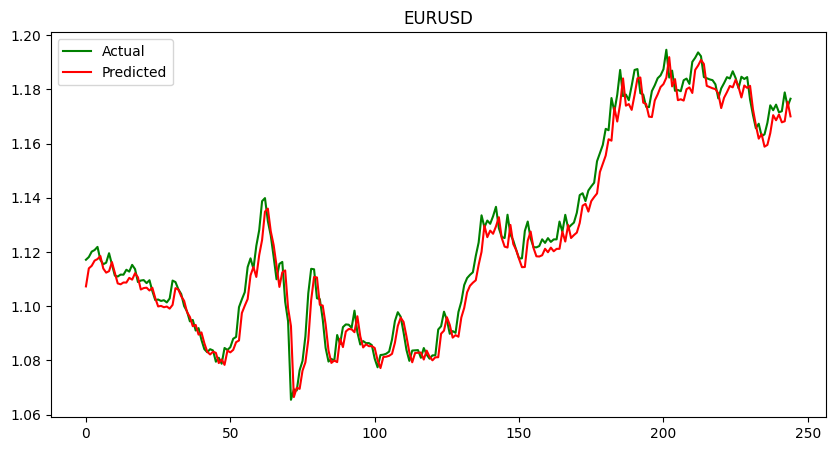

In [45]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('EURUSD')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


3.438732434082686e-05

In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9745160045529431
